In [47]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'Monospace'
plt.rcParams['figure.figsize'] = [8,6]

# E1)

For the first exercise we fill plot the potential of the fluxonium qubit for difference $\varphi_e$ which is
$$-E_J\cos(\varphi)+\frac{1}{2}E_L(\varphi+\varphi_e)^2$$ 
where $2\leq E_J/E_L\leq 10$. In the exercise it says to use a slider, but for a first version I'll just plot i for several $\varphi_e$


In [53]:
def potential(phi, phi_e):
    return -10*np.cos(phi)+(phi+phi_e)**2/2


phi_arr = np.linspace(-np.pi, np.pi, 200)

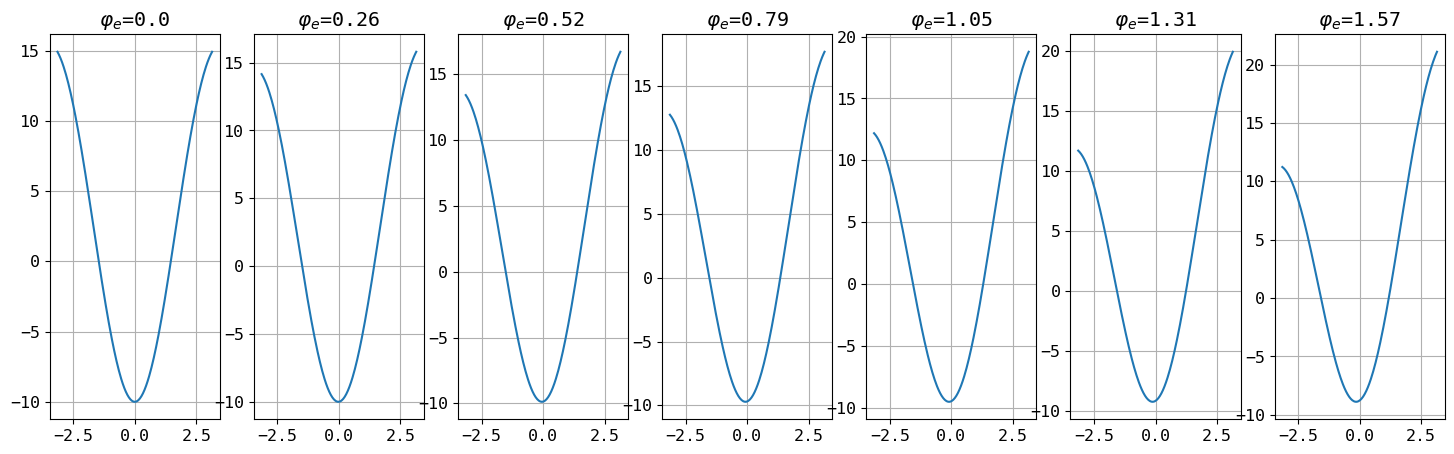

In [54]:
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(1, 7, figsize = (18,5))

phi_e_arr = np.linspace(0, np.pi/2, 7)

for i in range(len(phi_e_arr)):
    ax[i].plot(phi_arr, potential(phi_arr, phi_e_arr[i]))
    ax[i].set_title("$\\varphi_e$="+str(np.round(phi_e_arr[i], 2)))

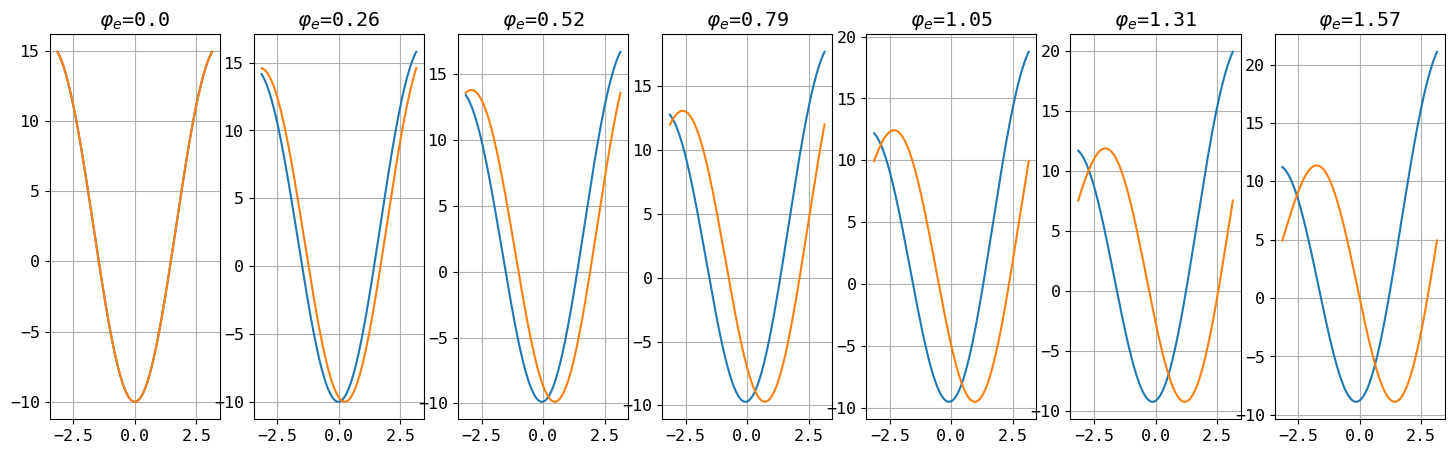

In [55]:
def potential_shifted(phi, phi_e):
    return -10*np.cos(phi-phi_e)+(phi)**2/2


fig, ax = plt.subplots(1, 7, figsize = (18,5))


for i in range(len(phi_e_arr)):
    ax[i].plot(phi_arr, potential(phi_arr, phi_e_arr[i]))
    ax[i].plot(phi_arr, potential_shifted(phi_arr, phi_e_arr[i]))
    ax[i].set_title("$\\varphi_e$="+str(np.round(phi_e_arr[i], 2)))

Unsurprisingly such a coordinate transformation simply shiftes the potential to the side.

# E2)

First we define the Hamiltonian in the flux basis

In [56]:
N = 200 #resolution
delta = 2*np.pi/N #Spacing between points
cutoff = 4*np.pi
phi = np.linspace(-cutoff, cutoff, N)



#q matrix
diagArr = np.ones(N)
offDiagArr = np.ones(N-1)
q2Matrix = 1/delta**2 * (2*np.diag(diagArr) - np.diag(offDiagArr, k = 1) - np.diag(offDiagArr, k = -1))

#Potential matrix
pot = potential(phi, np.pi)
potMatrix = np.diag(pot)

H = q2Matrix + potMatrix

eigenvalues, eigenvectors = sc.sparse.linalg.eigs(H, k=4, which = "SR")  



(-7.0, 32.0)

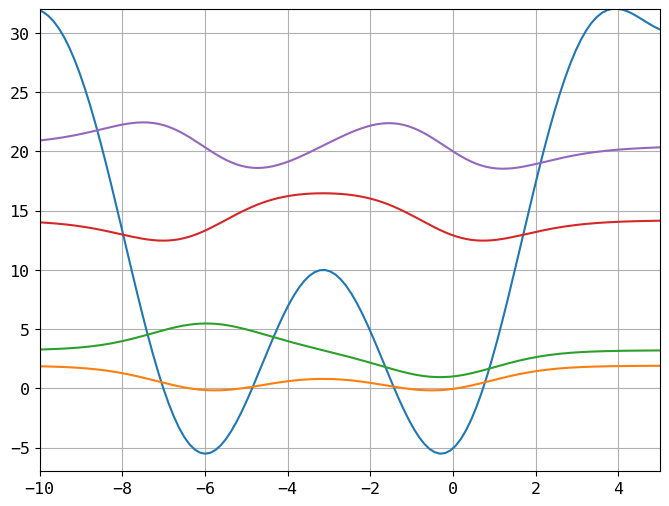

In [63]:
plt.plot(phi, pot)

for i in range(len(eigenvalues)):
    plt.plot(phi, 14*eigenvectors[:,i]+eigenvalues[i])

plt.xlim(-10,5)
plt.ylim(-7, 32)

In [64]:
offset_flux_arr = np.linspace(0, 2*np.pi, 200)

omega01 = np.zeros_like(offset_flux_arr)
omega12 = np.zeros_like(offset_flux_arr)
omega02 = np.zeros_like(offset_flux_arr)


for i in range(len(offset_flux_arr)):
    pot = potential(phi, offset_flux_arr[i])
    potMatrix = np.diag(pot)

    H = q2Matrix + potMatrix

    eigenvalues, eigenvectors = sc.sparse.linalg.eigs(H, k=3, which = "SR")  
    omega01[i]=eigenvalues[1]-eigenvalues[0]
    omega12[i]=eigenvalues[2]-eigenvalues[1]
    omega02[i]=eigenvalues[2]-eigenvalues[0]

C:\Users\marku\AppData\Local\Temp\ipykernel_10896\2661576026.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  omega01[i]=eigenvalues[1]-eigenvalues[0]
C:\Users\marku\AppData\Local\Temp\ipykernel_10896\2661576026.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  omega12[i]=eigenvalues[2]-eigenvalues[1]
C:\Users\marku\AppData\Local\Temp\ipykernel_10896\2661576026.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  omega02[i]=eigenvalues[2]-eigenvalues[0]


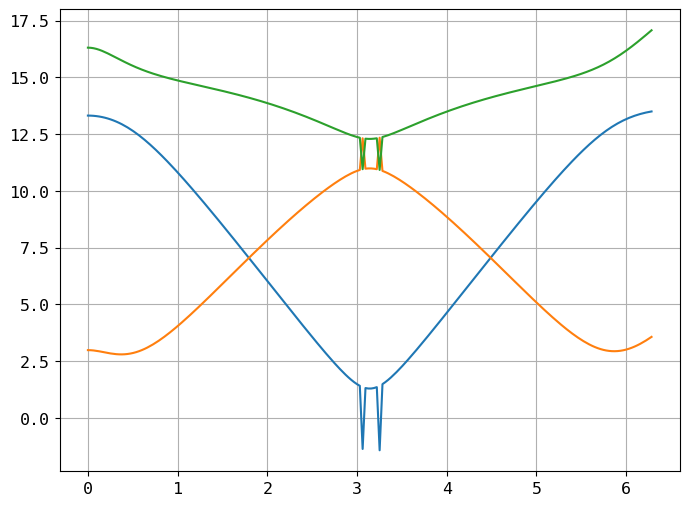

In [66]:
plt.plot(offset_flux_arr, omega01)
plt.plot(offset_flux_arr, omega12)
plt.plot(offset_flux_arr, omega02)